In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
dataset1= pd.read_csv('/content/drive/MyDrive/Dataset/Dataset/framingham.csv')
dataset2= pd.read_csv('/content/drive/MyDrive/Dataset/Dataset/CVD_Data.csv')

In [3]:
dataset1.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
dataset2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,58,1,0,1,2,0,88,39,0,0
1,1,70,0,0,1,2,1,69,36,2,0
2,1,52,0,0,1,2,0,78,18,2,0
3,1,75,0,1,1,3,1,244,27,0,0
4,1,32,0,0,1,2,1,78,32,1,0


In [5]:
dataset1.shape


(4240, 16)

In [6]:
dataset2.shape

(29072, 11)

In [7]:
dataset1.isnull().sum()


gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
dataset2.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
dataset1.isna().sum()


gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
dataset2.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
dataset1.dropna(inplace=True)


In [12]:
dataset2.dropna(inplace=True)

In [13]:
dataset1['TenYearCHD'].value_counts()


TenYearCHD
0    3101
1     557
Name: count, dtype: int64

In [14]:
dataset2['stroke'].value_counts()

stroke
0    28524
1      548
Name: count, dtype: int64

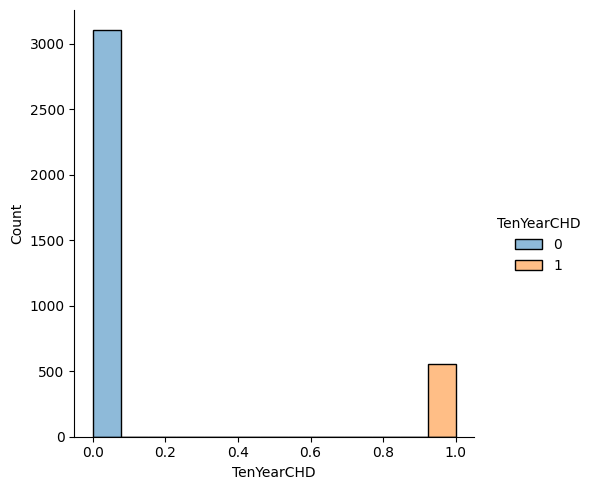

In [15]:
sn.displot(dataset1, x="TenYearCHD", hue='TenYearCHD')


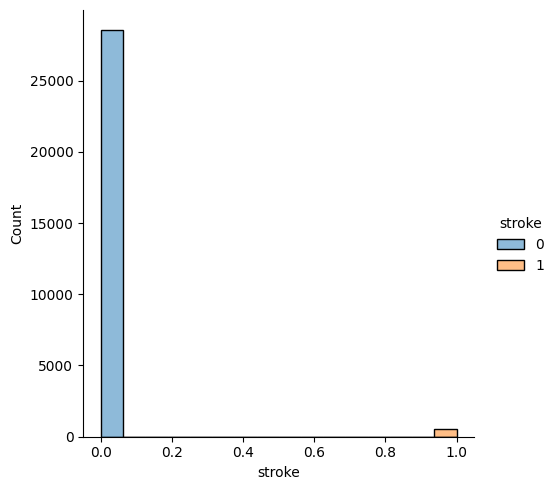

In [16]:
sn.displot(dataset2, x="stroke", hue='stroke')

In [17]:
noo_stroke = dataset1.loc[dataset1['TenYearCHD'] == 0].sample(n = 557)
stroke = dataset1.loc[dataset1['TenYearCHD'] == 1]
frames = [stroke,noo_stroke]
new_data1 = pd.concat(frames)

In [18]:
noo_stroke = dataset2.loc[dataset2['stroke'] == 0].sample(n = 557)
stroke = dataset2.loc[dataset2['stroke'] == 1]
frames = [stroke,noo_stroke]
new_data2 = pd.concat(frames)

In [19]:
new_data1.shape

(1114, 16)

In [20]:
new_data2.shape

(1105, 11)

In [21]:
new_data1['TenYearCHD'].value_counts()

TenYearCHD
1    557
0    557
Name: count, dtype: int64

In [22]:
new_data2['stroke'].value_counts()

stroke
0    557
1    548
Name: count, dtype: int64

In [23]:
new_dat1=new_data1.sample(n = 1114)

In [24]:
new_data2=new_data2.sample(n= 1105)

In [25]:
new_data1[0:8]

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
15,0,38,2.0,1,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0,1
17,0,46,2.0,1,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0,1
25,1,47,4.0,1,20.0,0.0,0,0,0,294.0,102.0,68.0,24.18,62.0,66.0,1
28,0,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
32,0,59,1.0,0,0.0,0.0,0,1,0,209.0,150.0,85.0,20.77,90.0,88.0,1
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1


In [26]:
new_data2[0:8]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9761,1,34,0,0,1,2,1,75,35,2,0
18961,0,37,0,0,1,3,1,99,33,1,0
25253,0,72,1,1,1,1,0,135,36,2,1
2554,1,45,0,0,1,2,1,94,30,2,1
23407,1,78,0,1,1,1,0,80,20,2,1
23610,1,22,0,0,0,2,1,122,37,2,0
11789,0,74,0,1,1,2,0,94,26,2,0
15478,1,49,0,0,1,2,1,93,22,0,0


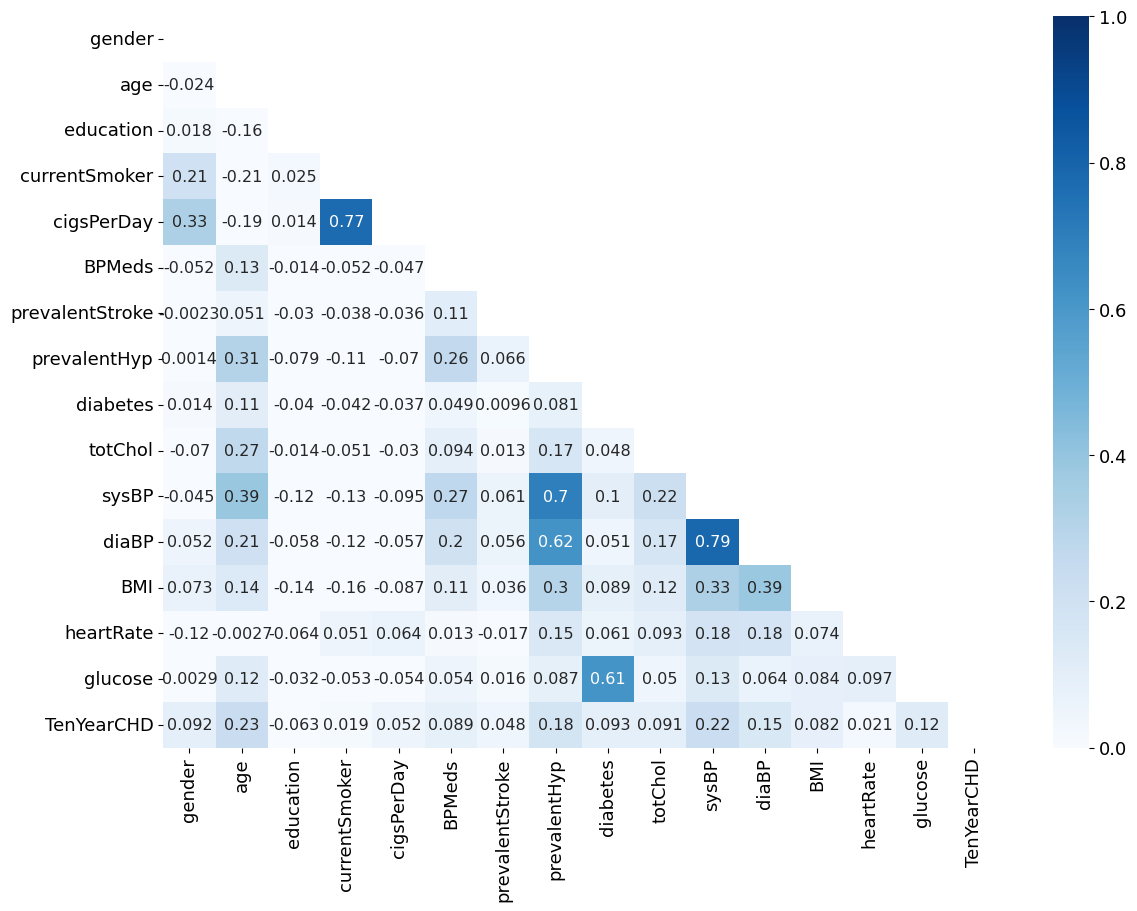

In [28]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)

plt.figure(figsize=(13.5, 9.5))

# Replace `np.bool` with `bool`
mask = np.triu(np.ones_like(dataset1.corr(), dtype=bool))

heatmap = sn.heatmap(dataset1.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='Blues', annot_kws={"size": 11.5})


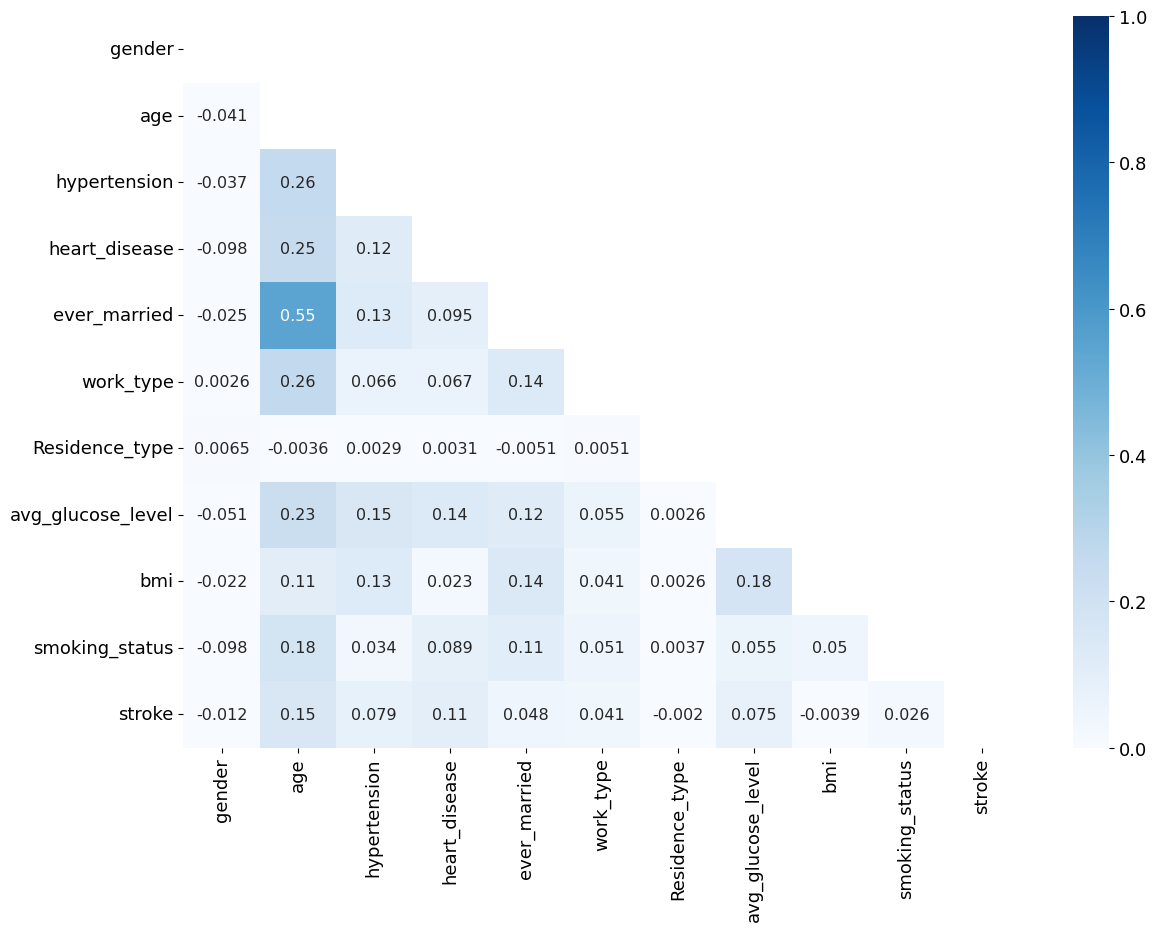

In [30]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)

plt.figure(figsize=(13.5, 9.5))

# Replace `np.bool` with `bool`
mask = np.triu(np.ones_like(dataset2.corr(), dtype=bool))

heatmap = sn.heatmap(dataset2.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='Blues', annot_kws={"size": 11.5})


In [31]:
#actuall dataset(15 columns)
predictors1= new_data1.iloc[:, 1:15]
labels1= new_data1.iloc[:,-1]
x_train1, x_test1, y_train1, y_test1= train_test_split(predictors1, labels1, test_size=0.2,random_state=42)

In [32]:
test1 = SelectKBest(score_func=f_classif, k=5)
fit1= test1.fit(x_train1, y_train1)

In [33]:
from numpy import set_printoptions
set_printoptions(precision=2)
print(np.round(fit1.scores_))
features1 = fit1.transform(x_train1)
print(features1[0:5,:])

[128.   9.   0.   1.   9.   3.  68.   8.  12.  79.  27.   9.   4.   9.]
[[ 48.    1.  230.  140.5  89. ]
 [ 53.    0.  235.  130.   80. ]
 [ 39.    0.  220.  107.   76.5]
 [ 67.    1.  245.  169.   82. ]
 [ 39.    1.  227.  132.   92. ]]


<BarContainer object of 14 artists>

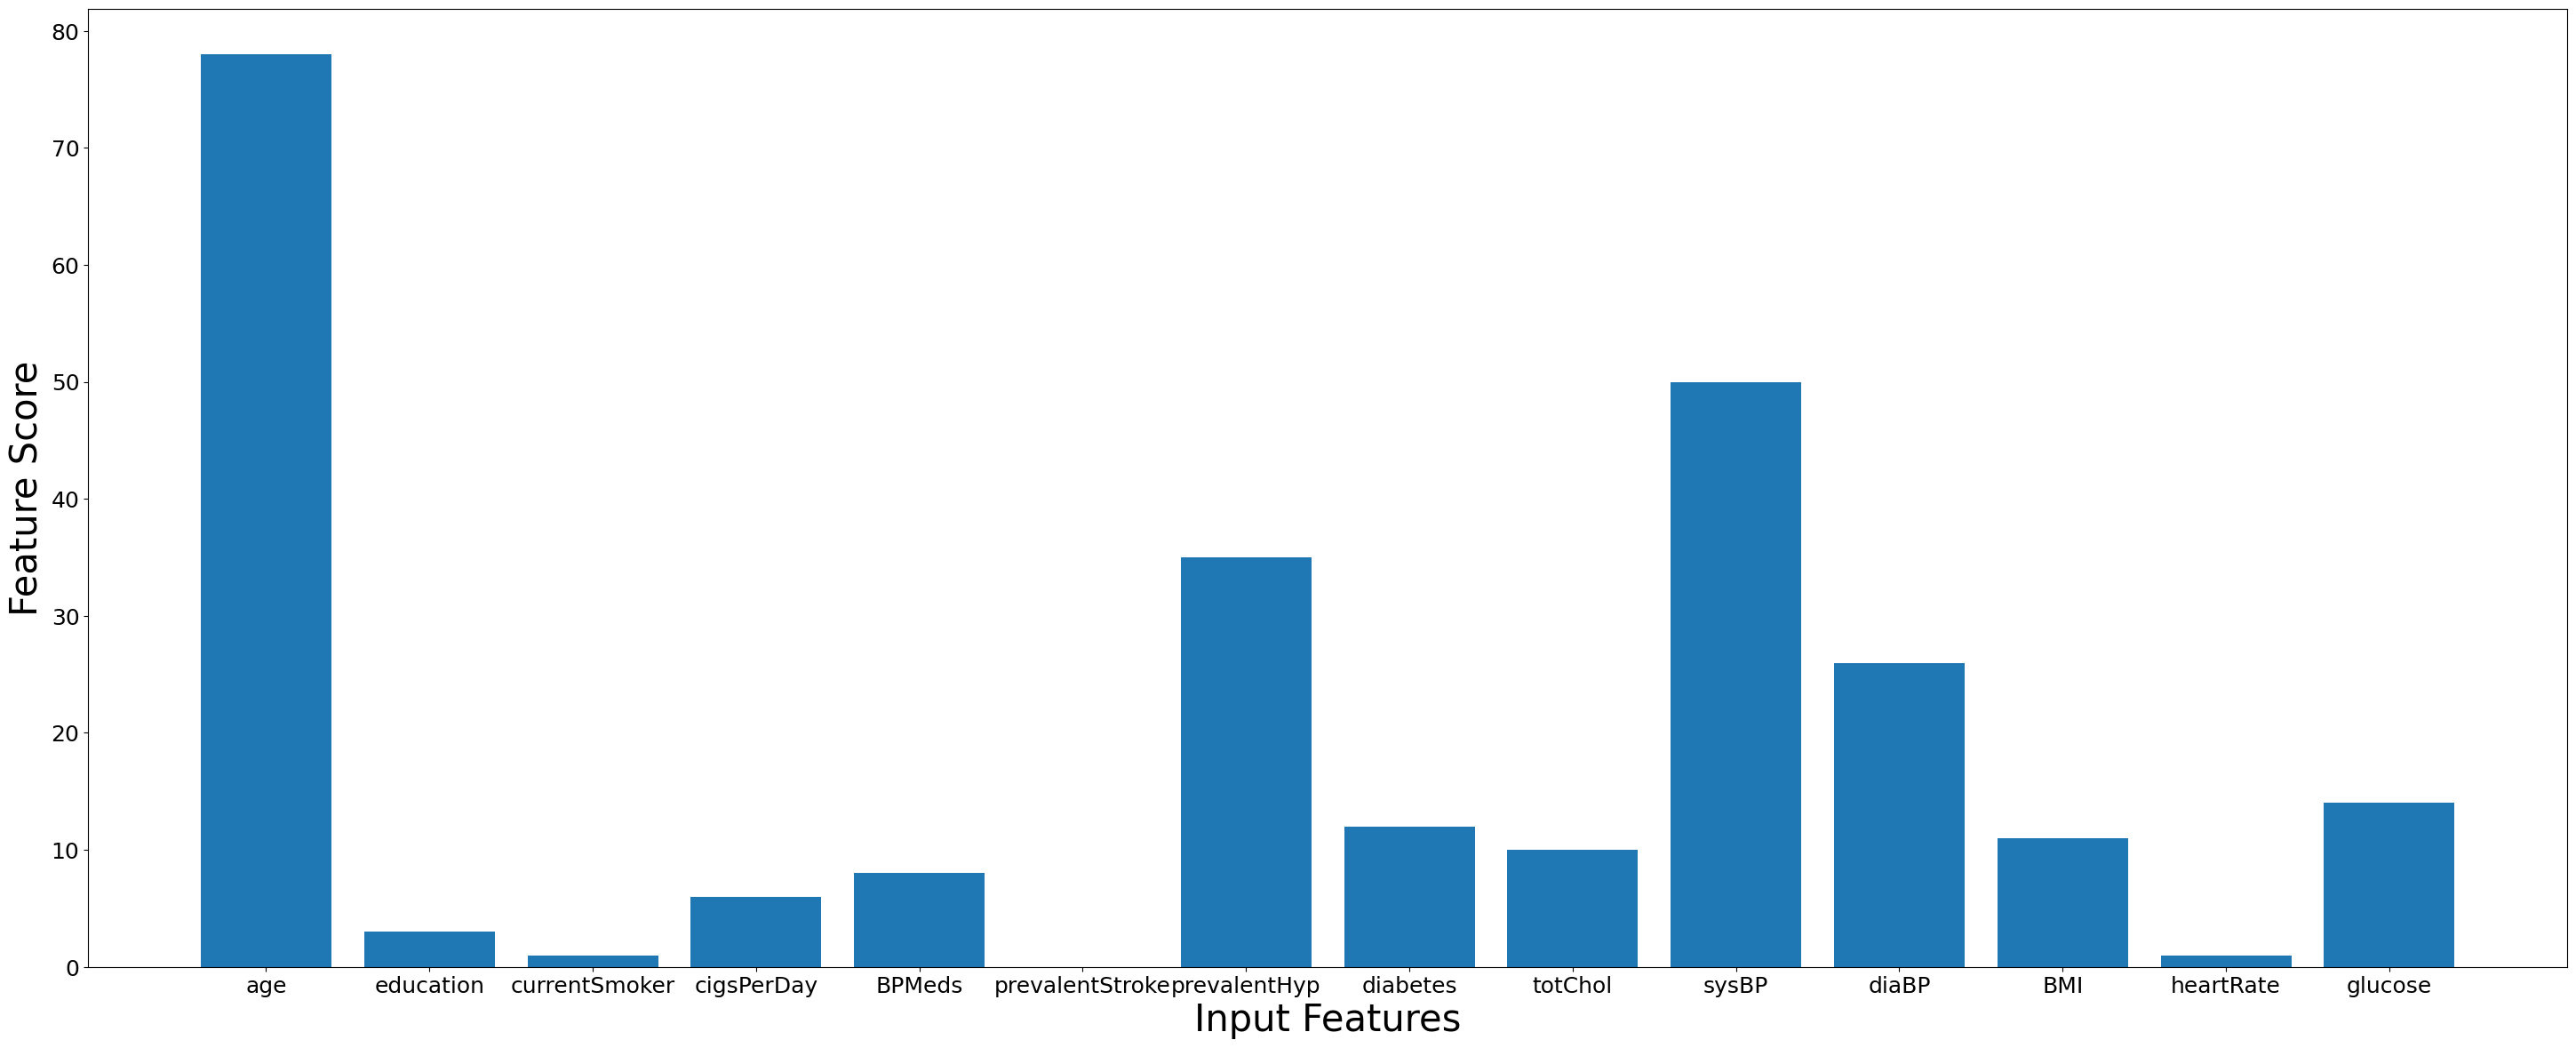

In [34]:
from matplotlib import rcParams
data1=[78,  3,  1,  6,  8,  0, 35, 12, 10, 50, 26, 11,  1, 14]
labelsize=18
rcParams['xtick.labelsize']= labelsize
rcParams['ytick.labelsize']= labelsize
plt.figure(figsize =(36, 14))
labels = ['age',	'education',	'currentSmoker',	'cigsPerDay',	'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose']
plt.xlabel('Input Features', fontsize=30)
plt.ylabel('Feature Score', fontsize=30)
plt.bar(labels, data1)

In [35]:
predictors2=new_data1[['age','sysBP','prevalentHyp','diaBP','glucose']]
labels2=new_data1['TenYearCHD']
x_train2, x_test2, y_train2, y_test2 = train_test_split(predictors2, labels2, test_size=0.20,random_state=42)

In [36]:
test2 = SelectKBest(score_func=f_classif, k=5)
fit2= test2.fit(x_train2, y_train2)

In [37]:
from numpy import set_printoptions
set_printoptions(precision=2)
print(np.round(fit2.scores_))
features2 = fit2.transform(x_train2)
print(features2[0:5,:])

[128.  79.  68.  27.   9.]
[[ 48.  140.5   1.   89.   80. ]
 [ 53.  130.    0.   80.   78. ]
 [ 39.  107.    0.   76.5  78. ]
 [ 67.  169.    1.   82.  122. ]
 [ 39.  132.    1.   92.   74. ]]


In [43]:
#cvd Dataset 11columns
predictors3= new_data2.iloc[:, 1:10]
labels3= new_data2.iloc[:,-1]
x_train3, x_test3, y_train3, y_test3= train_test_split(predictors3, labels3, test_size=0.2,random_state=42)

In [44]:
test3 = SelectKBest(score_func=f_classif, k=4)
fit3= test3.fit(x_train3,y_train3)

In [45]:
#cvd Dataset 4 columns
predictors4=new_data2[['age','hypertension','heart_disease','avg_glucose_level']]
labels4=new_data2['stroke']
x_train4, x_test4, y_train4, y_test4 = train_test_split(predictors4, labels4, test_size=0.20,random_state=42)

In [46]:
test4 = SelectKBest(score_func=f_classif, k=4)
fit4= test4.fit(x_train4, y_train4)

In [47]:
from numpy import set_printoptions
set_printoptions(precision=2)
print(np.round(fit3.scores_))
features3 = fit3.transform(x_train3)
print(features3[0:5,:])

[404.  54.  64.  43.  21.   1.  41.   2.  10.]
[[79  0  0  0]
 [78  0  0  1]
 [48  0  0  1]
 [52  1  1  1]
 [72  1  1  1]]


In [48]:
from numpy import set_printoptions
set_printoptions(precision=2)
print(np.round(fit4.scores_))
features4 = fit4.transform(x_train4)
print(features4[0:5,:])

[404.  54.  64.  41.]
[[ 79   0   0  72]
 [ 78   0   0  82]
 [ 48   0   0  74]
 [ 52   1   1 209]
 [ 72   1   1 135]]


<BarContainer object of 11 artists>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


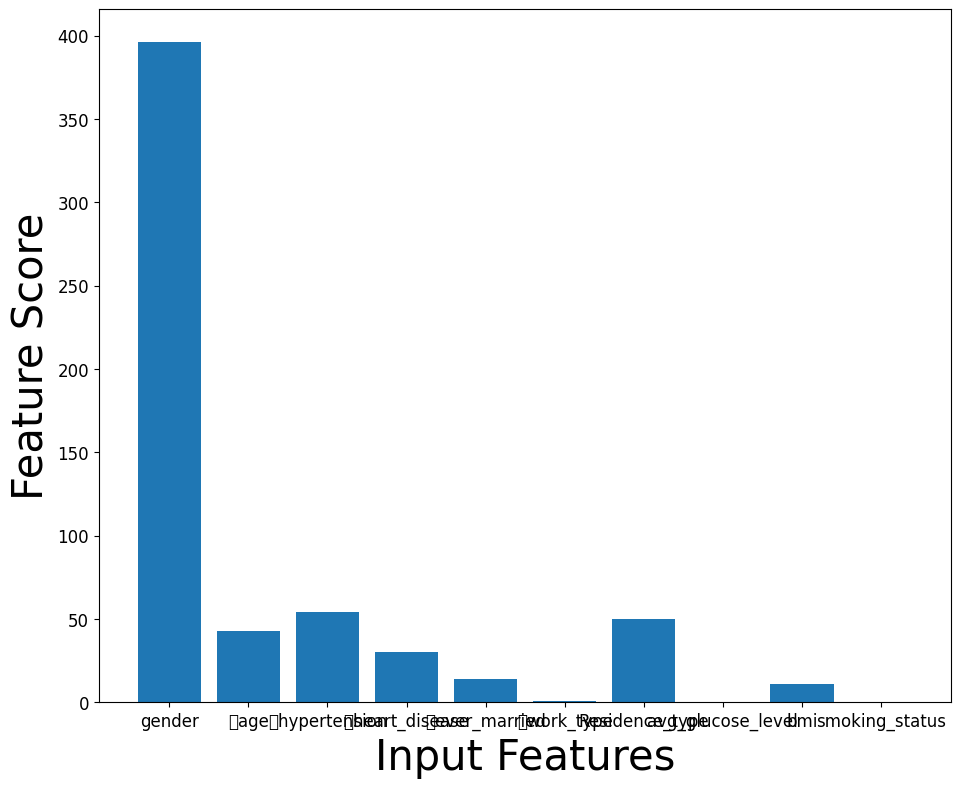

In [49]:
from math import inf
from matplotlib import rcParams
data2=[396,43,54,30,14,1,50, 0, 11, 0, inf]
labelsize=12
rcParams['xtick.labelsize']= labelsize
rcParams['ytick.labelsize']= labelsize
plt.figure(figsize =(11, 9))
labels = ['gender','	age','	hypertension','	heart_disease','	ever_married','	work_type'	,'Residence_type','avg_glucose_level'	,'bmi'	,'smoking_status'	,'stroke']
plt.xlabel('Input Features', fontsize=30)
plt.ylabel('Feature Score', fontsize=30)
plt.bar(labels, data2)

In [50]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

In [51]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,random_state=17)

In [52]:
models1,predictions1 = clf.fit(x_train1, x_test1, y_train1, y_test1)

100%|██████████| 29/29 [00:02<00:00, 10.29it/s]

[LightGBM] [Info] Number of positive: 442, number of negative: 449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496072 -> initscore=-0.015713
[LightGBM] [Info] Start training from score -0.015713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [53]:
models2,predictions2 = clf.fit(x_train2, x_test2, y_train2, y_test2)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:06<00:00,  4.75it/s]

[LightGBM] [Info] Number of positive: 442, number of negative: 449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496072 -> initscore=-0.015713
[LightGBM] [Info] Start training from score -0.015713


In [54]:
models3,predictions3 = clf.fit(x_train3, x_test3, y_train3, y_test3)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:04<00:00,  6.56it/s]

[LightGBM] [Info] Number of positive: 442, number of negative: 442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 884, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [55]:
models4,predictions4 = clf.fit(x_train4, x_test4, y_train4, y_test4)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:04<00:00,  5.90it/s]


[LightGBM] [Info] Number of positive: 442, number of negative: 442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 884, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [56]:
models1# Results using all the features

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.71,0.71,0.71,0.71,0.13
LogisticRegression,0.71,0.71,0.71,0.71,0.04
CalibratedClassifierCV,0.71,0.71,0.71,0.71,0.32
RidgeClassifierCV,0.71,0.71,0.71,0.71,0.04
RidgeClassifier,0.71,0.71,0.71,0.71,0.04
LinearDiscriminantAnalysis,0.71,0.71,0.71,0.71,0.07
SVC,0.68,0.68,0.68,0.68,0.09
Perceptron,0.68,0.68,0.68,0.68,0.03
PassiveAggressiveClassifier,0.67,0.67,0.67,0.67,0.05


In [57]:
models2# Results using selected the features

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.67,0.67,0.67,0.67,0.07
LinearSVC,0.67,0.67,0.67,0.67,0.18
CalibratedClassifierCV,0.67,0.67,0.67,0.67,0.73
RidgeClassifierCV,0.67,0.67,0.67,0.67,0.06
RidgeClassifier,0.67,0.67,0.67,0.67,0.03
LinearDiscriminantAnalysis,0.67,0.67,0.67,0.67,0.08
BernoulliNB,0.65,0.66,0.66,0.65,0.10
SVC,0.65,0.66,0.66,0.65,0.17
QuadraticDiscriminantAnalysis,0.65,0.66,0.66,0.63,0.03


In [58]:
models3# Results using all the features

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.76,0.75,0.75,0.76,0.03
NearestCentroid,0.74,0.74,0.74,0.74,0.03
NuSVC,0.74,0.74,0.74,0.74,0.18
SVC,0.73,0.73,0.73,0.73,0.12
LogisticRegression,0.73,0.73,0.73,0.73,0.04
LinearSVC,0.72,0.72,0.72,0.72,0.12
LGBMClassifier,0.72,0.72,0.72,0.72,0.11
BernoulliNB,0.71,0.72,0.72,0.72,0.03
LinearDiscriminantAnalysis,0.71,0.72,0.72,0.72,0.06


In [59]:
models4# Results using selected the features

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.75,0.75,0.75,0.75,0.14
Perceptron,0.75,0.75,0.75,0.75,0.03
LGBMClassifier,0.74,0.74,0.74,0.74,0.17
SVC,0.74,0.74,0.74,0.74,0.08
NearestCentroid,0.73,0.73,0.73,0.73,0.02
NuSVC,0.73,0.73,0.73,0.73,0.10
XGBClassifier,0.72,0.73,0.73,0.72,0.32
GaussianNB,0.73,0.72,0.72,0.72,0.05
CalibratedClassifierCV,0.72,0.72,0.72,0.72,0.23
